## Walkablity of Cities
### Initial Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Walkability Data - Sheet2.csv")
df.head()

,City,State,Walk Score,Transit Score,Bike Score,Population
0,New York,NY,88.0,88.6,69.3,"8,175,133"
1,Los Angeles,CA,68.6,52.9,58.7,"3,792,621"
2,Chicago,IL,77.2,65,72.2,"2,695,598"
3,Houston,TX,47.5,36.2,48.6,"2,099,451"
4,Philadelphia,PA,74.8,67,66.7,"1,526,006"


In [3]:
elevation = pd.read_csv("Elevation Data - Sheet1.csv", dtype={"High Feet":float, "Low Feet": float}, thousands = ",")
elevation.head()

,City,State,Rank,High Feet,Low Feet
0,New York,New York,1,410.0,0.0
1,Chicago,Illinois,2,673.0,579.0
2,Los Angeles,California,3,5074.0,0.0
3,Philadelphia,Pennsylvania,4,441.0,0.0
4,Houston,Texas,5,83.0,0.0


In [10]:
elevation["Change in Elevation"] = elevation["High Feet"] - elevation["Low Feet"]
elevation.head()

,City,State,Rank,High Feet,Low Feet,Change in Elevation
0,New York,New York,1,410.0,0.0,410.0
1,Chicago,Illinois,2,673.0,579.0,94.0
2,Los Angeles,California,3,5074.0,0.0,5074.0
3,Philadelphia,Pennsylvania,4,441.0,0.0,441.0
4,Houston,Texas,5,83.0,0.0,83.0


In [11]:
combined = pd.merge(df, elevation, left_on="City", right_on="City")
Y = combined["Change in Elevation"].values
X = combined["Walk Score"].values.reshape(-1, 1)

In [6]:
regressor = LinearRegression()
regressor.fit(X, Y)
y_pred = regressor.predict(X)

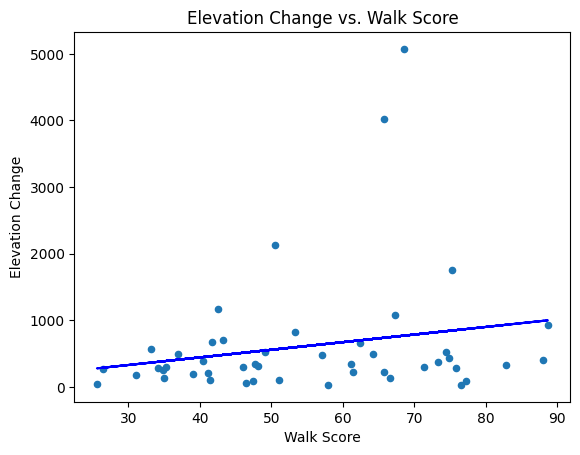

In [7]:
combined.plot(x = "Walk Score", y = "Change in Elevation", kind = "scatter")
plt.plot(X, y_pred, color = "blue")
plt.xlabel("Walk Score")
plt.ylabel("Elevation Change")
plt.title("Elevation Change vs. Walk Score")
plt.show()